In [1]:
!pip install yfinance
!pip install scikit-learn
!pip install keras
!pip install tensorflow
!pip install --upgrade pandas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
symbol = 'GOOG'
start = '2012-01-01'
end = '2022-12-21'

data = yf.download(symbol, start, end)

[*********************100%***********************]  1 of 1 completed


In [4]:
data.reset_index(inplace=True)

In [5]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...,...
2756,2022-12-14,95.540001,97.220001,93.940002,95.309998,95.309998,26452900
2757,2022-12-15,93.540001,94.029999,90.430000,91.199997,91.199997,28298800
2758,2022-12-16,91.199997,91.750000,90.010002,90.860001,90.860001,48485500
2759,2022-12-19,90.879997,91.199997,88.925003,89.150002,89.150002,23020500


In [6]:
ma_100_days = data.Close.rolling(100).mean()

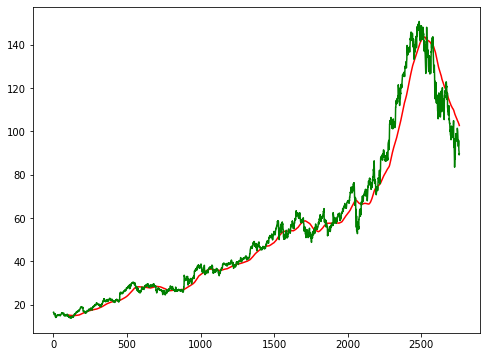

In [7]:
plt.figure(figsize = (8,6))
plt.plot(ma_100_days , 'r')
plt.plot(data.Close, 'g')
plt.show()

In [8]:
ma_200_days = data.Close.rolling(200).mean()

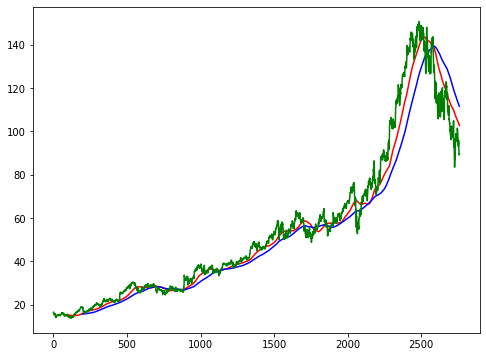

In [9]:
plt.figure(figsize = (8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days , 'b')
plt.plot(data.Close, 'g')
plt.show()

In [10]:
data.dropna (inplace=True)
data_train = pd.DataFrame(data.Close[0: int(len(data) *0.80)])
data_test = pd.DataFrame(data.Close[int (len(data) *0.80): len(data)])

In [11]:
data_train.shape[0]

2208

In [12]:
data_test.shape[0]

553

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler (feature_range=(0,1))
data_train_scale = scaler.fit_transform (data_train)

In [36]:
x = [ ]
y = [ ]
for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale [i-100: i])
    y.append(data_train_scale [i,0])

In [37]:
x, y = np.array(x), np.array(y)

In [38]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [39]:
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = ((x.shape[1],1))))
model.add(Dropout (0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout (0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout (0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout (0.5))

model.add(Dense (units =1))

In [40]:
model.compile(optimizer = "adam", loss = "mean_squared_error")

In [41]:
model.fit(x,y, epochs = 50, batch_size= 32, verbose = 1)

Epoch 1/50
66/66 [==============================] - 21s 229ms/step - loss: 0.0320
Epoch 2/50
66/66 [==============================] - 15s 226ms/step - loss: 0.0071
Epoch 3/50
66/66 [==============================] - 17s 260ms/step - loss: 0.0070
Epoch 4/50
66/66 [==============================] - 17s 260ms/step - loss: 0.0054
Epoch 5/50
66/66 [==============================] - 17s 262ms/step - loss: 0.0054
Epoch 6/50
66/66 [==============================] - 17s 260ms/step - loss: 0.0050
Epoch 7/50
66/66 [==============================] - 17s 261ms/step - loss: 0.0042
Epoch 8/50
66/66 [==============================] - 17s 261ms/step - loss: 0.0045
Epoch 9/50
66/66 [==============================] - 17s 262ms/step - loss: 0.0039
Epoch 10/50
66/66 [==============================] - 17s 262ms/step - loss: 0.0036
Epoch 11/50
66/66 [==============================] - 17s 261ms/step - loss: 0.0041
Epoch 12/50
66/66 [==============================] - 16s 242ms/step - loss: 0.0040
Epoch 13/50
6

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
dropout_4 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 100, 60)           26640     
_________________________________________________________________
dropout_5 (Dropout)          (None, 100, 60)           0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 100, 80)           45120     
_________________________________________________________________
dropout_6 (Dropout)          (None, 100, 80)           0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 120)              

In [43]:
pas_100_days = data_train.tail (100)
data_test= pd.concat([pas_100_days, data_test], ignore_index=True)
data_test_scale = scaler.fit_transform(data_test)

In [51]:
x = [ ]
y = [ ]
for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale [i-100: i])
    y.append(data_test_scale [i,0])

x,y = np.array(x), np.array(y)

In [52]:
y_predict = model.predict(x)

In [53]:
y_predict

array([[0.14641455],
       [0.14630362],
       [0.14620778],
       [0.1458737 ],
       [0.14514711],
       [0.14396924],
       [0.14235887],
       [0.14043415],
       [0.13835785],
       [0.13631116],
       [0.1344381 ],
       [0.13276497],
       [0.1313504 ],
       [0.13026938],
       [0.12959442],
       [0.129392  ],
       [0.12950636],
       [0.1297503 ],
       [0.12999141],
       [0.1302014 ],
       [0.13041897],
       [0.13064915],
       [0.13087068],
       [0.13111818],
       [0.13147044],
       [0.1319    ],
       [0.13236776],
       [0.13265157],
       [0.1325835 ],
       [0.13213381],
       [0.1314146 ],
       [0.13065496],
       [0.13016659],
       [0.13017318],
       [0.1308187 ],
       [0.13219503],
       [0.13438964],
       [0.13732743],
       [0.14086086],
       [0.14478405],
       [0.14888026],
       [0.15293509],
       [0.1569097 ],
       [0.16079092],
       [0.16459163],
       [0.1681597 ],
       [0.17130767],
       [0.173

In [54]:
scale = 1/scaler.scale_

In [55]:
y_predict=y_predict * scale

In [56]:
y=y*scale

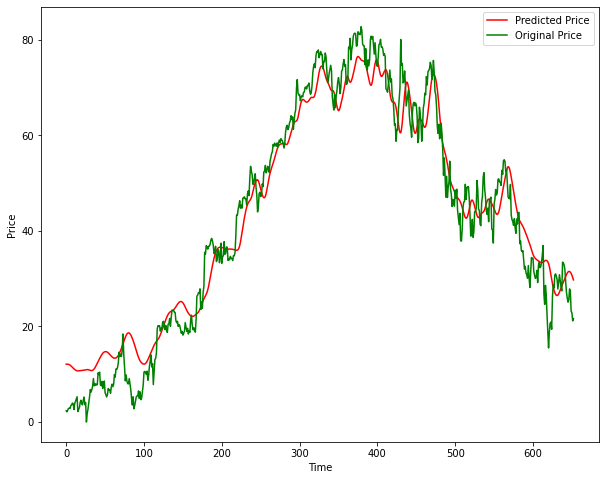

In [57]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [58]:
model.save("Stock_predictionModel.keras")